In [1]:
import pandas as pd
from forecaster import Forecaster

In [2]:
df = pd.read_csv('PJME.csv')
df.head()

,Datetime,PJME_MW
0,2011-03-01 00:00:00,27845.0
1,2011-03-01 01:00:00,26516.0
2,2011-03-01 02:00:00,25968.0
3,2011-03-01 03:00:00,25927.0
4,2011-03-01 04:00:00,26225.0


In [3]:
model = Forecaster(
    df,
    x = 'Datetime',
    y = 'PJME_MW'
)

In [4]:
model.make_future_dataframe(periods=744)
model.df.tail()

,Datetime,PJME_MW
2204,2011-05-31 20:00:00,NaN
2205,2011-05-31 21:00:00,NaN
2206,2011-05-31 22:00:00,NaN
2207,2011-05-31 23:00:00,NaN
2208,2011-06-01 00:00:00,NaN


  0%|          | 0/440 [00:00<?, ?it/s]

,Training score,Test score
Ridge,0.005416,0.104062


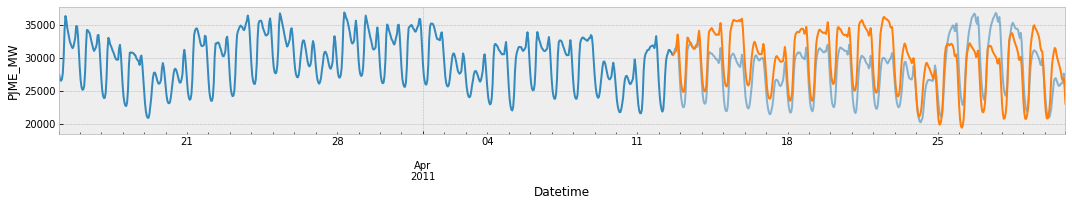

In [5]:
from sklearn.linear_model import Ridge
y_valid, scores = model.validate(Ridge, seasonality = True, lag = True, plot = True)

  0%|          | 0/745 [00:00<?, ?it/s]

,Training score
Ridge,0.004821


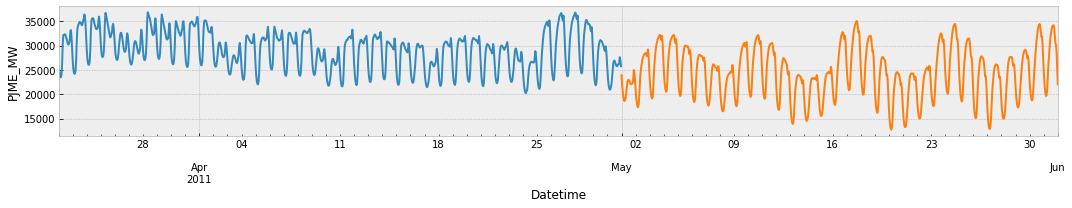

,Datetime,PJME_MW
0,2011-05-01 00:00:00,23875.251853
1,2011-05-01 01:00:00,22007.247739
2,2011-05-01 02:00:00,20563.204068
3,2011-05-01 03:00:00,19540.168899
4,2011-05-01 04:00:00,18886.356817


In [6]:
forecast, scores = model.forecast(Ridge, seasonality = True, lag = True, plot = True)
forecast.head()